In [1]:
import csv
def get_data(filename, column_name):

    # Open the CSV file
    with open(filename, mode='r') as file:
        csv_reader = csv.DictReader(file)
        
        # Extract the column
        column_data = [float(row[column_name]) for row in csv_reader]
    return column_data
   

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn theme for improved aesthetics
sns.set_theme(style="whitegrid")


In [3]:
def draw(two_gate, move, transfer, name):
    # Data for number of qubits
    x = np.array([i for i in range(5,51)])

    # Data for individual error components
    c1 = two_gate
    c2 = move
    c3 = transfer
    component_1 = np.array([-np.log10(i) for i in c1])
    component_2 = np.array([-np.log10(i) for i in c2])
    component_3 = np.array([-np.log10(i) for i in c3])
    total_error = component_1 + component_2 + component_3

    # Create the stacked plot
    plt.figure(figsize=(12, 8))

    # Improved colors and hatch patterns
    plt.fill_between(x, component_1, color=sns.color_palette("Blues")[4], alpha=0.6, hatch='//', edgecolor='darkblue', linewidth=0.5, label='2Q gate')
    plt.fill_between(x, component_1 + component_2, component_1, color=sns.color_palette("Oranges")[3], alpha=0.8, hatch='xx', edgecolor='darkorange', linewidth=0.5, label='decoherence')
    plt.fill_between(x, component_1 + component_2 + component_3, component_1 + component_2, 
                    color=sns.color_palette("Greens")[3], alpha=0.7, hatch='--', edgecolor='darkgreen', linewidth=0.5, label='atom transfer')
    plt.plot(x, total_error, 'o-', color='black', markersize=6, linewidth=1.5, label='Total Error')

    # Set custom y-axis labels to reflect log scale behavior (descending)
    ymax = int(max(total_error))
    y_ticks = [i for i in range(0,ymax,ymax//10)]
    y_labels = [f'$10^{{-{int(tick)}}}$' if tick != 0 else '0' for tick in y_ticks]
    plt.yticks(y_ticks, y_labels, fontsize=12)

    # Invert y-axis to make lower values at the bottom
    plt.gca().invert_yaxis()

    # Labels and title with improved fonts and padding
    plt.xlabel('Number of Qubits', fontsize=14, weight='bold', labelpad=15)
    plt.ylabel('fidelity, log scale', fontsize=14, weight='bold', labelpad=15)
    plt.title(f'{name} Error Breakdown', fontsize=16, weight='bold', pad=20)

    # Improved legend styling
    plt.legend(loc='lower left', fontsize=12, fancybox=True, shadow=True, frameon=True)

    # Add grid lines for clarity, improved style
    plt.grid(True, which="both", linestyle='--', linewidth=0.7, color='gray', alpha=0.5)

    # Display the plot
    plt.tight_layout()
    plt.savefig(f"{name.replace(' ','_')}.pdf",)

In [4]:
def read_draw(filename,name):
    c1 = get_data(filename,'cir_fidelity_2q_gate')
    c2 = get_data(filename,'cir_fidelity_2q_gate_for_idle')
    two_gate = [c1[i]*c2[i] for i in range(len(c1))]
    
    trans = get_data(filename,'cir_fidelity_atom_transfer')
    move = get_data(filename, 'cir_fidelity_coherence')
    
    draw(two_gate,move,trans,name)
    

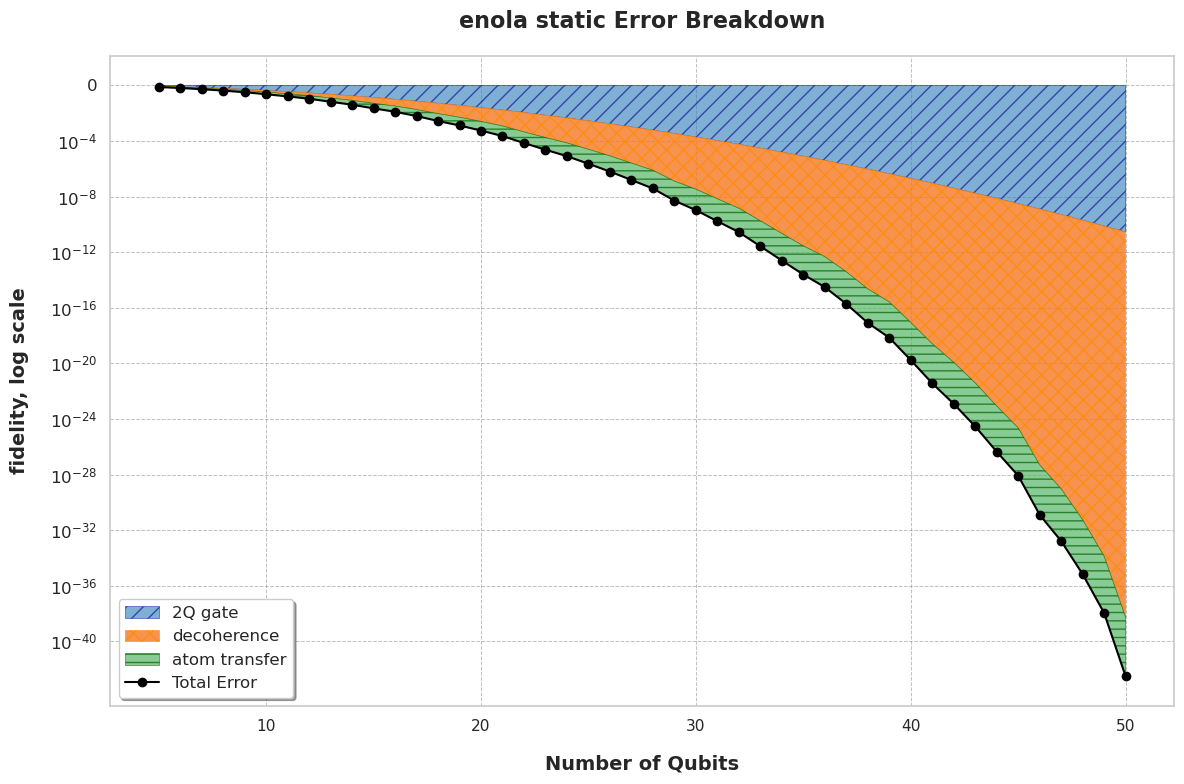

In [5]:
filename= 'data/enola/True_combined_main_results.csv'
name = 'enola static'
read_draw(filename,name)

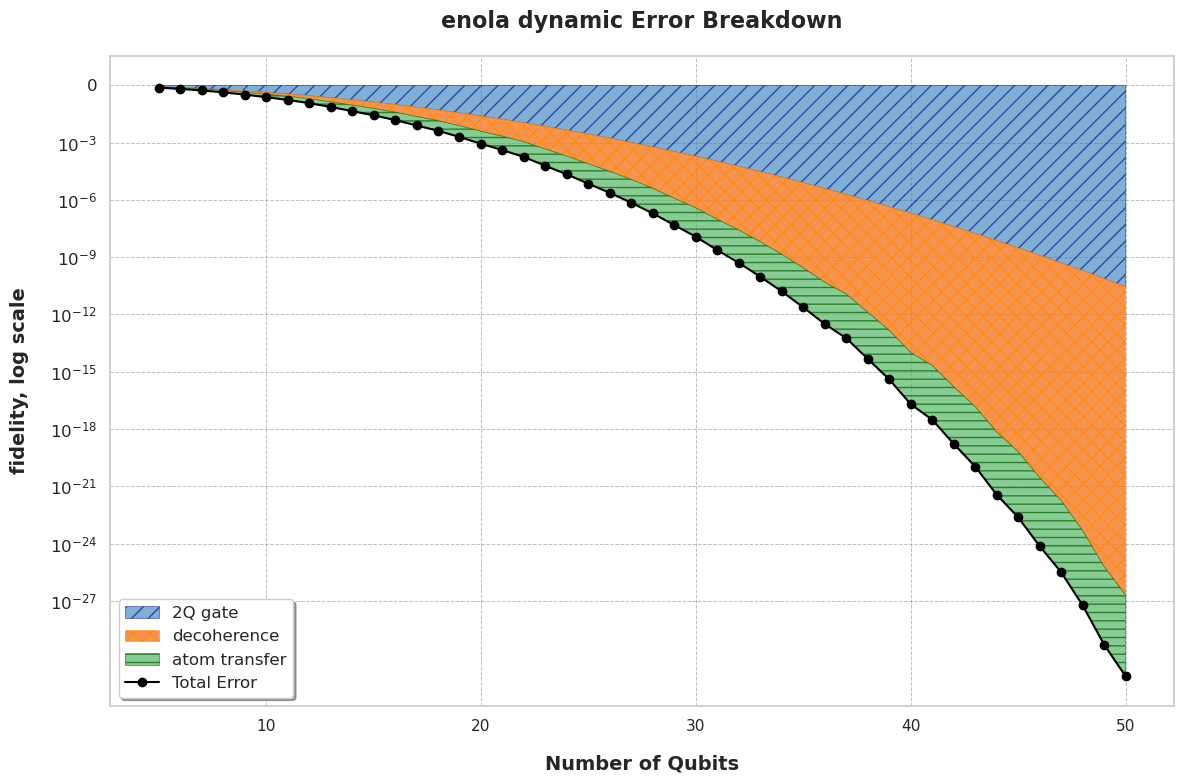

In [6]:
filename= 'data/enola/False_combined_main_results.csv'
name = 'enola dynamic'
read_draw(filename,name)

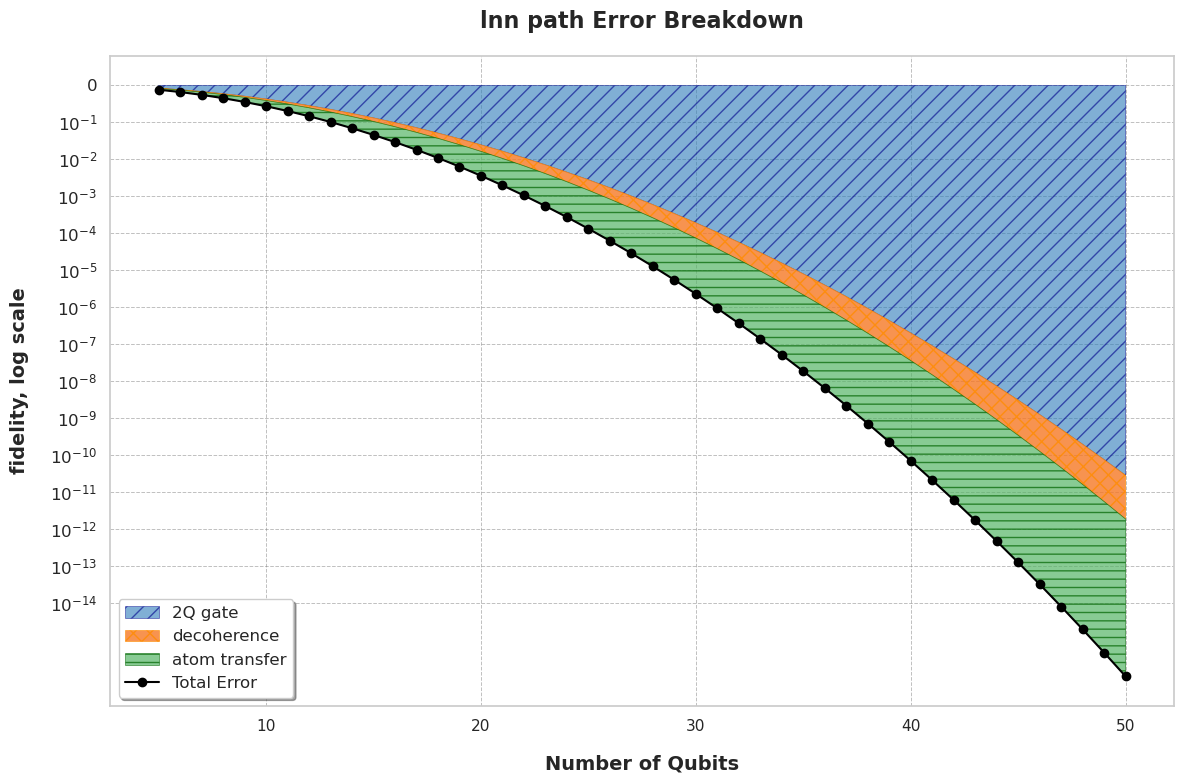

In [7]:
filename= 'data/False_combined_main_results_.csv'
name = 'lnn path'
read_draw(filename,name)

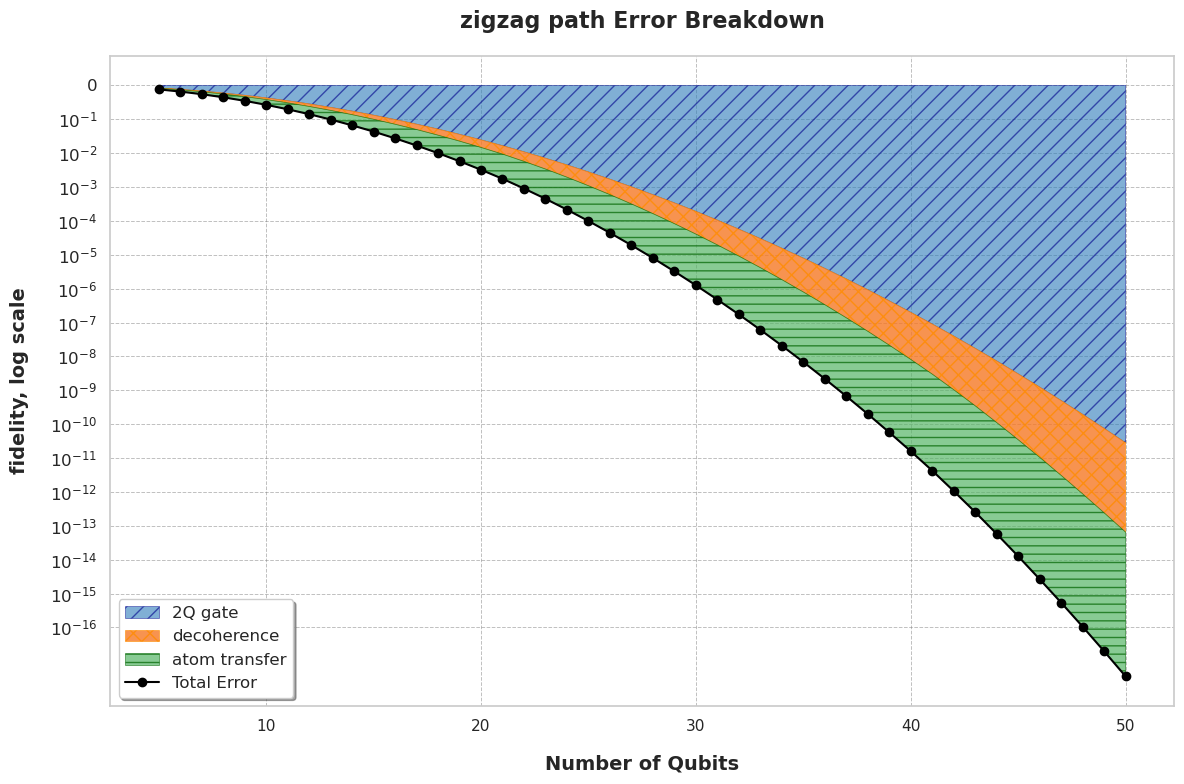

In [8]:
filename= 'data/True_combined_main_results_.csv'
name = 'zigzag path'
read_draw(filename,name)